In [24]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt

def unpickle(file):

    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [40]:
file_name = "datas/data_batch_1"
train1 = unpickle(file_name)

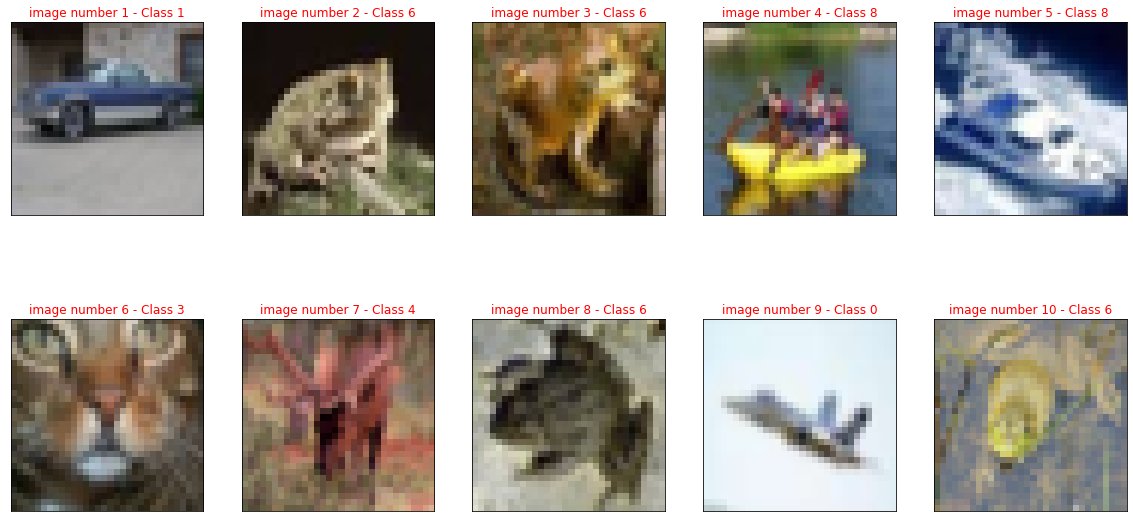

In [67]:
data = train1[b'data']
labels = train1[b'labels']

fig, axes = plt.subplots(2, 5, figsize=(20,10))

for i, ax in enumerate(axes.flat):
    R = data[i,0:32*32]
    G = data[i,32*32:32*32*2]
    B = data[i,2*32*32:32*32*3]
    img = np.zeros((32,32,3))
    img[:,:,0] = R.reshape(32,32)
    img[:,:,1] = G.reshape(32,32)
    img[:,:,2] = B.reshape(32,32)
    ax.imshow(img/255)
    ax.set_title("image number {0} - Class {1}".format(i+1, labels[i]), color='r')
    ax.set_xticks([])
    ax.set_yticks([])